**Nama : Alfendo Rizky Syachputra**

**Kode : PYTN-KS10-024**

## Assigment 1

Dataset yang digunakan London Crime Data 2008 - 2016

Crime in major metropolitan areas, such as London, occurs in distinct patterns. This data covers the number of criminal reports by month, LSOA borough, and major/minor category from Jan 2008-Dec 2016.

* lsoa_code: code for Lower Super Output Area in Greater London.

* borough: Common name for London borough.

* major_category: High level categorization of crime

* minor_category: Low level categorization of crime within major category.

* value: monthly reported count of categorical crime in given borough

* year: Year of reported counts, 2008-2016

* month: Month of reported counts, 1-12

**Import Library**

In [275]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

**Import Data**

In [276]:
df = pd.read_csv("london_crime_by_lsoa.csv")

In [277]:
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [92]:
df.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [104]:
# menampilkan baris dan kolom
df.shape

(13490604, 7)

In [106]:
# descriptive statistics
df.describe()

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


In [107]:
# describe tipe data object
df.describe(include=[object])

,lsoa_code,borough,major_category,minor_category
count,13490604,13490604,13490604,13490604
unique,4835,33,9,32
top,E01003689,Croydon,Theft and Handling,Theft From Motor Vehicle
freq,3456,602100,3966300,522180


In [12]:
# check data apakah terdapat nilai yang null
df.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [13]:
# menghitung jumlah kasus disetiap wilayah
df['borough'].value_counts().to_frame()

,borough
Croydon,602100
Barnet,572832
Ealing,549396
Bromley,523908
Lambeth,519048
Enfield,511164
Wandsworth,498636
Brent,490644
Lewisham,485136
Southwark,483300


In [108]:
# menghitung jumlah kasus major_category
df['major_category'].value_counts().to_frame()

,major_category
Theft and Handling,3966300
Violence Against the Person,3171744
Criminal Damage,2069172
Drugs,1179468
Burglary,1043604
Robbery,939384
Other Notifiable Offences,776304
Fraud or Forgery,236520
Sexual Offences,108108


In [109]:
# menghitung jumlah kasus minor_category
df['minor_category'].value_counts().to_frame()

,minor_category
Theft From Motor Vehicle,522180
Other Theft,522180
Common Assault,522180
Harassment,522072
Burglary in Other Buildings,522072
Theft/Taking Of Motor Vehicle,522072
Criminal Damage To Motor Vehicle,521964
Other Criminal Damage,521856
Assault with Injury,521856
Possession Of Drugs,521748


In [80]:
# menghitung kasus di setiap tahunnya
df['year'].value_counts().to_frame()

,year
2008,1498956
2009,1498956
2010,1498956
2011,1498956
2012,1498956
2013,1498956
2014,1498956
2015,1498956
2016,1498956


## Visualisasi Data

In [112]:
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [181]:
# menghapus beberapa kolom untuk melakukan analisis
top5 = ['lsoa_code', 'major_category', 'minor_category', 'month']
df.drop(top5, axis=1, inplace=True)
df.head()

,borough,value,year
0,Croydon,0,2016
1,Greenwich,0,2016
2,Bromley,0,2015
3,Redbridge,0,2016
4,Wandsworth,0,2008


In [117]:
# digunakan untuk mengetahui jumlah kasus di setiap wilayah setiap tahunnya
town = df.pivot_table(values='value', index=['borough'], columns=['year'], aggfunc=np.sum)
town.head()

year,2008,2009,2010,2011,2012,2013,2014,2015,2016
borough,,,,,,,,,
Barking and Dagenham,17656,17713,17130,16686,15990,15759,15426,16346,16741
Barnet,23944,23449,23416,24007,23573,22510,22572,24036,24684
Bexley,15305,14445,13166,11325,11669,11552,11844,11990,12840
Brent,23504,24748,25512,27669,26357,23759,24426,24883,26693
Bromley,24015,21858,19572,19868,19622,18945,19668,20637,20164


In [194]:
# menambahkan kolom total
town['Total'] = town.sum(axis=1)
town.head()

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
borough,,,,,,,,,,
Barking and Dagenham,17656,17713,17130,16686,15990,15759,15426,16346,16741,298894
Barnet,23944,23449,23416,24007,23573,22510,22572,24036,24684,424382
Bexley,15305,14445,13166,11325,11669,11552,11844,11990,12840,228272
Brent,23504,24748,25512,27669,26357,23759,24426,24883,26693,455102
Bromley,24015,21858,19572,19868,19622,18945,19668,20637,20164,368698


In [119]:
# membuat variable baru dan menampilkan jumlah kasus nya dari tahun 2008 - 2016
years = list(range(2008, 2017))
top5_df = town['Total'].sort_values(ascending=False).head(5).index
top5_df = town.loc[top5_df, years]
top5_df = top5_df.T

In [120]:
top5_df.head()

borough,Westminster,Lambeth,Southwark,Camden,Newham
year,,,,,
2008,47846,31717,33470,32010,29752
2009,48456,31225,30623,31612,28610
2010,48116,31671,31320,31804,30728
2011,54243,33224,30723,33956,27978
2012,59226,33473,30737,31472,30067


### 1 . Area Plot

Text(0.5, 0, 'Tahun')

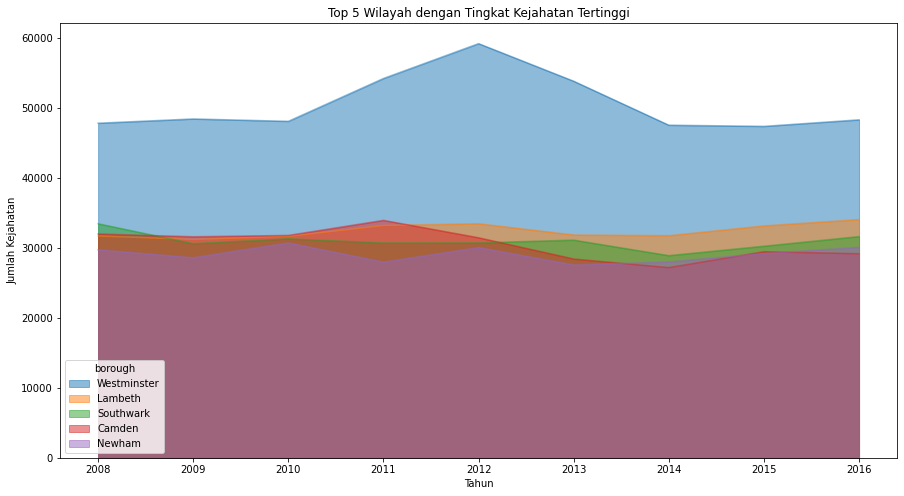

In [129]:
top5_df.plot(kind= 'area',
             stacked = False,
             figsize = (15, 8))
plt.title("Top 5 Wilayah dengan Tingkat Kejahatan Tertinggi")
plt.ylabel('Jumlah Kejahatan')
plt.xlabel('Tahun')

**Conclusion**

Terlihat dari visualisasi diatas dapat disimpulkan bahwasannya kasus tertinggi terjadi pada wilayah Westminster yang berjumlah mencapai 59226 pada tahun 2012, dan kasus terendah berada di wilayah Newham berjumlah 27978 yang terjadi pada tahun 2011.

### 2 . Histogram

In [163]:
town

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
borough,,,,,,,,,,
Barking and Dagenham,17656,17713,17130,16686,15990,15759,15426,16346,16741,149447
Barnet,23944,23449,23416,24007,23573,22510,22572,24036,24684,212191
Bexley,15305,14445,13166,11325,11669,11552,11844,11990,12840,114136
Brent,23504,24748,25512,27669,26357,23759,24426,24883,26693,227551
Bromley,24015,21858,19572,19868,19622,18945,19668,20637,20164,184349
Camden,32010,31612,31804,33956,31472,28435,27198,29477,29183,275147
City of London,0,0,0,69,157,110,115,151,178,780
Croydon,29516,29784,29373,29830,30189,27444,27357,28089,28712,260294
Ealing,28947,28617,31360,29537,28832,25917,24978,26247,27127,251562


In [171]:
# memilih 5 wilayah untuk dilakukan perbandingan
years = list(range(2008,2017))
df_br = df_br.loc[years, ['Barnet', 'Ealing', 'Merton', 'Sutton', 'Westminster']]
df_br

borough,Barnet,Ealing,Merton,Sutton,Westminster
year,,,,,
2008,23944,28947,13875,12943,47846
2009,23449,28617,13561,12240,48456
2010,23416,31360,13595,12032,48116
2011,24007,29537,13548,11068,54243
2012,23573,28832,12856,10948,59226
2013,22510,25917,11595,10057,53852
2014,22572,24978,11596,10443,47564
2015,24036,26247,12273,10598,47395
2016,24684,27127,12755,10658,48330


In [165]:
# numpy
count, bin_edges = np.histogram(df_br, bins=10)

print(count)
print(bin_edges)

[18  0  9  8  1  0  0  6  2  1]
[10057.  14973.9 19890.8 24807.7 29724.6 34641.5 39558.4 44475.3 49392.2
 54309.1 59226. ]


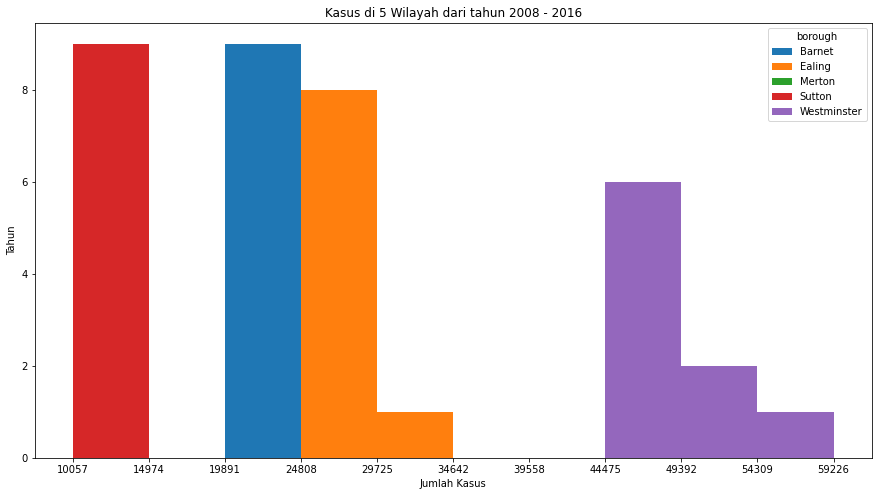

In [170]:
df_br.plot(kind='hist',
             bins=10,
             xticks=bin_edges,
             figsize=(15,8));
plt.title("Kasus di 5 Wilayah dari tahun 2008 - 2016");
plt.xlabel("Jumlah Kasus");
plt.ylabel("Tahun");

**Conclusion**

Dapat disimpulkan dari visualisasi diatas bahwasannya wilayah sutton terjadi kasus paling rendah dibandingkan dengan wilayah lainnya dari tahun 2008 - 2016.

### 3 . Bar Chart

In [188]:
years = list(range(2008, 2017))
top10_df = town['Total'].sort_values(ascending=False).head(10).index
top10_df = town.loc[top10_df, years]
top10_df = top10_df.T

In [189]:
top10_df.sum()

borough
Westminster      455028
Lambeth          292178
Southwark        278809
Camden           275147
Newham           262024
Croydon          260294
Ealing           251562
Islington        230286
Tower Hamlets    228613
Brent            227551
dtype: int64

Text(0, 0.5, 'Angka Kejahatan')

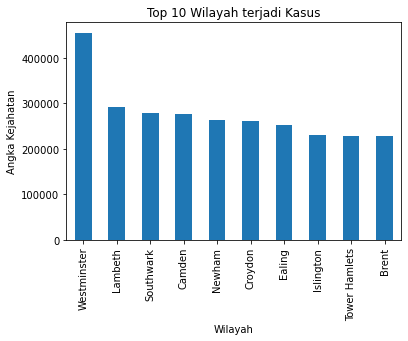

In [190]:
top10_df.sum().plot(kind='bar');
plt.title("Top 10 Wilayah terjadi Kasus")
plt.xlabel("Wilayah")
plt.ylabel("Angka Kejahatan")

Text(0, 0.5, 'Wilayah')

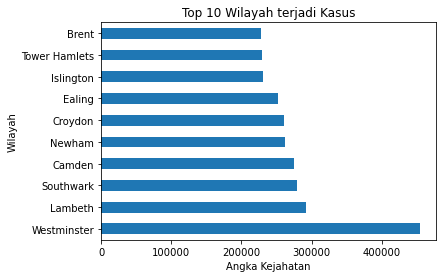

In [192]:
top10_df.sum().plot(kind='barh');
plt.title("Top 10 Wilayah terjadi Kasus")
plt.xlabel("Angka Kejahatan")
plt.ylabel("Wilayah")

**Conclusion**

Dapat disimpulkan dari visualiasi diatas bahwasannya wilayah Brent menjadi wilayah dengan kasus terendah dari 9 wilayah lainnya, dan kasus tertinggi terjadi pada wilayah Westminster.

### 4 . Pie Chart

In [278]:
# membuat variable baru yang berisi value, major_category, year
major = df.pivot_table(values='value', index=['major_category'], columns=['year'], aggfunc=np.sum)
major

year,2008,2009,2010,2011,2012,2013,2014,2015,2016
major_category,,,,,,,,,
Burglary,88092,90619,86826,93315,93392,87222,76053,70489,68285
Criminal Damage,91872,85565,77897,70914,62158,56206,59279,62976,64071
Drugs,68804,60549,58674,57550,51776,50278,44435,39785,38914
Fraud or Forgery,5325,0,0,0,0,0,0,0,0
Other Notifiable Offences,10112,10644,10768,10264,10675,10811,13037,14229,15809
Robbery,29627,29568,32341,36679,35260,29337,22150,21383,22528
Sexual Offences,1273,0,0,0,0,0,0,0,0
Theft and Handling,283692,279492,290924,309292,334054,306372,279880,284022,294133
Violence Against the Person,159844,160777,157894,146901,150014,146181,185349,218740,232381


In [279]:
# menambahkan kolom total
major['Total'] = major.sum(axis=1)
major

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
major_category,,,,,,,,,,
Burglary,88092,90619,86826,93315,93392,87222,76053,70489,68285,754293
Criminal Damage,91872,85565,77897,70914,62158,56206,59279,62976,64071,630938
Drugs,68804,60549,58674,57550,51776,50278,44435,39785,38914,470765
Fraud or Forgery,5325,0,0,0,0,0,0,0,0,5325
Other Notifiable Offences,10112,10644,10768,10264,10675,10811,13037,14229,15809,106349
Robbery,29627,29568,32341,36679,35260,29337,22150,21383,22528,258873
Sexual Offences,1273,0,0,0,0,0,0,0,0,1273
Theft and Handling,283692,279492,290924,309292,334054,306372,279880,284022,294133,2661861
Violence Against the Person,159844,160777,157894,146901,150014,146181,185349,218740,232381,1558081


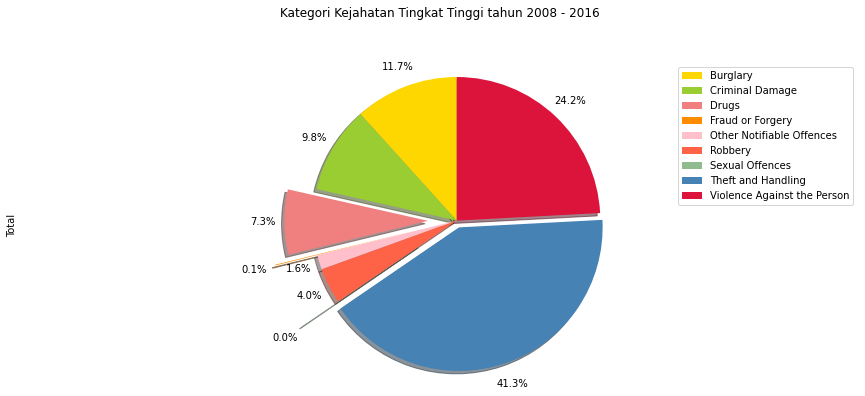

In [233]:
# melakukan visualisasi dengan pie chart

colors_list  = ['gold','yellowgreen','lightcoral','darkorange','pink','tomato','darkseagreen','steelblue','crimson']
explode_list = [0,0,0.2,0.3,0,0,0.3,0.05,0]

major['Total'].plot(kind='pie',
                    figsize=(15,6),
                    autopct="%.1f%%",
                    startangle=90,
                    shadow=True,
                    labels=None,
                    pctdistance=1.15,
                    colors=colors_list,
                    explode=explode_list);

plt.legend(labels=major.index);
plt.title("Kategori Kejahatan Tingkat Tinggi tahun 2008 - 2016", y=1.12);
plt.axis('equal');
plt.show()

**Conclusion**

Berdasarkan visualisasi diatas kejahatan tinggi di dominasi kasus Theft and Handling yang mencapai 41.3 %, berbanding terbalik dengan kasus Sexual Offences dengan tingkat kasus 0 % (tidak ada kasus).

### 5 . Box Plot

In [244]:
# membuat variable baru dan mengambil kolom major_category
df_plot = major.copy().T
df_plot

major_category,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person
year,,,,,,,,,
2008,88092,91872,68804,5325,10112,29627,1273,283692,159844
2009,90619,85565,60549,0,10644,29568,0,279492,160777
2010,86826,77897,58674,0,10768,32341,0,290924,157894
2011,93315,70914,57550,0,10264,36679,0,309292,146901
2012,93392,62158,51776,0,10675,35260,0,334054,150014
2013,87222,56206,50278,0,10811,29337,0,306372,146181
2014,76053,59279,44435,0,13037,22150,0,279880,185349
2015,70489,62976,39785,0,14229,21383,0,284022,218740
2016,68285,64071,38914,0,15809,22528,0,294133,232381


In [252]:
years = list(range(2008,2017))
df_plot = major.loc[['Burglary'], years].T
df_plot

major_category,Burglary
year,
2008,88092
2009,90619
2010,86826
2011,93315
2012,93392
2013,87222
2014,76053
2015,70489
2016,68285


In [257]:
# descriptive statistics
df_plot.describe()

major_category,Burglary
count,9.000000
mean,83810.333333
std,9658.166674
min,68285.000000
25%,76053.000000
50%,87222.000000
75%,90619.000000
max,93392.000000


Text(0.5, 0, 'Kasus')

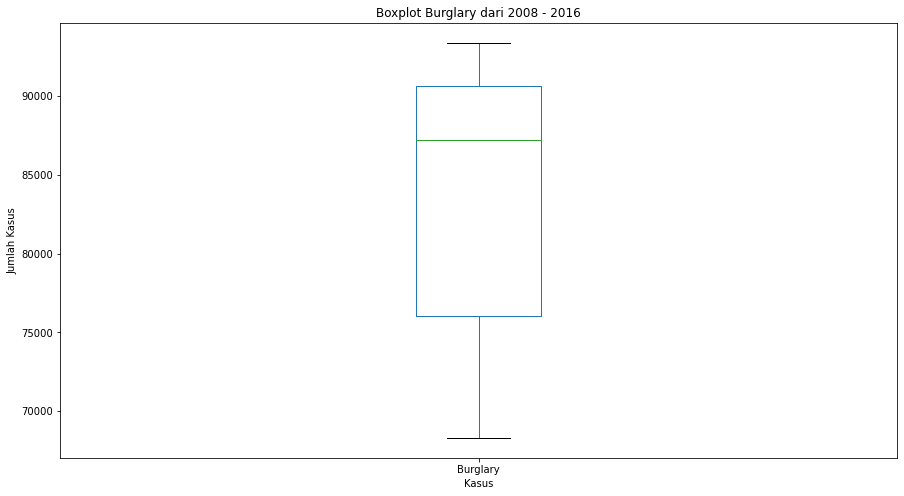

In [258]:
df_plot.plot(kind='box', figsize=(15,8))

plt.title('Boxplot Burglary dari 2008 - 2016')
plt.ylabel('Jumlah Kasus')
plt.xlabel('Kasus')

**Conclusion**

**Burglary**
* Berdasarkan hasil visualisasi boxplot bahwasannya nilai minimum berada di antara 6000 & 7000 (First Quartile)
* Nilai median berada diantara 8000 & 9000 mendekati Q3
* Dan nilai maximum > 9000 (Third Quartile)

### 6 . Scatter Plot

In [280]:
df_sc = major.copy().T
df_sc

major_category,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person
year,,,,,,,,,
2008,88092,91872,68804,5325,10112,29627,1273,283692,159844
2009,90619,85565,60549,0,10644,29568,0,279492,160777
2010,86826,77897,58674,0,10768,32341,0,290924,157894
2011,93315,70914,57550,0,10264,36679,0,309292,146901
2012,93392,62158,51776,0,10675,35260,0,334054,150014
2013,87222,56206,50278,0,10811,29337,0,306372,146181
2014,76053,59279,44435,0,13037,22150,0,279880,185349
2015,70489,62976,39785,0,14229,21383,0,284022,218740
2016,68285,64071,38914,0,15809,22528,0,294133,232381


In [281]:
years = list(range(2008,2017))
df_sc = df_sc.loc[years, ['Burglary']]
df_sc

major_category,Burglary
year,
2008,88092
2009,90619
2010,86826
2011,93315
2012,93392
2013,87222
2014,76053
2015,70489
2016,68285


In [282]:
# melakukan reset index pada dataframe df_sc
df_sc.reset_index(inplace=True)

# menampilkan columns year dan burglary
df_sc.columns = ['year', 'Burglary']
df_sc.head()

,year,Burglary
0,2008,88092
1,2009,90619
2,2010,86826
3,2011,93315
4,2012,93392


Text(0, 0.5, 'Jumlah Kasus')

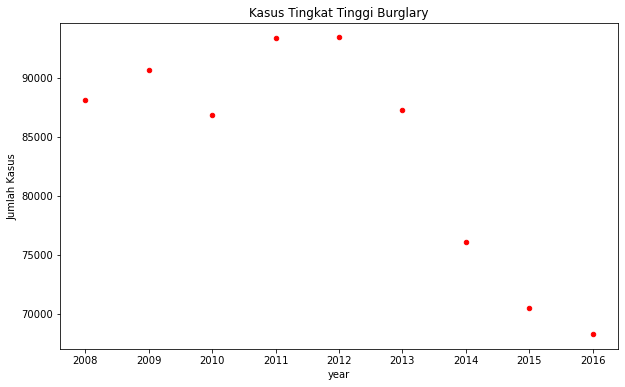

In [290]:
df_sc.plot(kind='scatter', x='year', y='Burglary', figsize=(10, 6), color='red')

plt.title('Kasus Tingkat Tinggi Burglary')
plt.xlabel('year')
plt.ylabel('Jumlah Kasus')

**Conclusion**

Berdasarkan hasil Scatter Plot diatas kasus Burglary pada tahun 2008 - 2011 mempunyai trend yang masih naik turun, sedangkan pada tahun 2012 - 2016 memiliki trend menurun yang dapat diartikan semakin berkurang kasus Burglary.

### 7 . Word Clouds

In [287]:
# menggunakan stopwords yang telah di import, selanjutnya menambahkan set untuk menghapus kata yang berlebihan
stopwords = set(STOPWORDS)

In [288]:
# kolom yang akan digunakan
minor = ' '.join(df.minor_category)

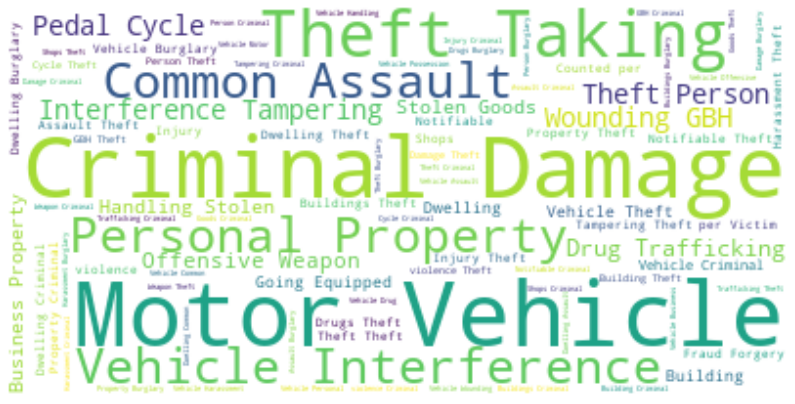

In [289]:
# instantiate a word cloud object
minor_wordcloud = WordCloud(
background_color='white',
max_words=2000,
stopwords=stopwords
)

# generate the word cloud
minor_wordcloud .generate(minor)
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(minor_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Conclusion**

Berdasarkan hasil wordcloud diatas kata yang paling umum adalah Criminal Damage, Motor Vehicle, Theft Taking, karena tiga kata tersebut memiliki ukuran yang semakin besar dan tebal.

### **Overall Analysis**

Berdasarkan hasil dari visualisasi yang telah dilakukan bahwasannya wilayah Westminster menjadi wilayah dengan tingkat kasus yang tinggi. Kategori kejahatan tingkat tinggi di dominasi dengan kasus Theft and Handling sebesar 41.3 %.

Selanjutnya melakukan analisis kasus tingkat tinggi Burglary, bahwasannya kasus ini terjadi penurunan yang lebih signifikan pada tahun 2012 - 2016.
Kemudian dilakukan analisis menggunkan wordcloud dengan menggunkan kolom minor_category, terlihat bahwasannya Criminal Damage, Motor Vehicle, Theft Taking menjadi kasus yang sering terjadi dibandingkan dengan kasus lainnya.